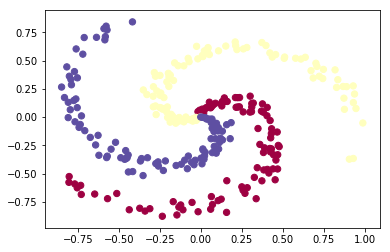

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy as np
def makeSpirals():
    N = 100  # number of points per class
    D = 2  # dimensionality
    K = 3  # number of classes
    X = np.zeros((N * K, D))  # data matrix (each row = single example)
    labels = np.zeros(N * K, dtype='uint8')  # class labels
    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        labels[ix] = j
    #lets visualize the data:
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.Spectral)
    plt.show()
    return X,labels

X_train,labels=makeSpirals()

In [13]:
ohe = OneHotEncoder(n_values=3)
y_train_enc = ohe.fit_transform(labels.reshape(-1, 1)).toarray()

In [14]:
import numpy as np
from scipy.special import expit
expit(-1000)#The expit function, also known as the logistic function, is defined as expit(x) = 1/(1+exp(-x)). It is the inverse of the logit function.
class FCNeuron(object):
    def __init__(self):
        self._w1 = None
        self._w2 = None
        self._b1 = None
        self._b2 = None
        self._w1_grad = 0
        self._w2_grad = 0
        self._b1_grad = 0
        self._b2_grad = 0
        self._x = None
        self._t = None

    def set_params(self, w, b):
        self._w1, self._w2 = w[0], w[1]
        self._b1, self._b2 = b[0], b[1]

    def forpass(self, x):
        self._x = x
        self._t = self._sigmoid(np.dot(self._x, self._w1) + self._b1)
        _y_hat = np.dot(self._t, self._w2) + self._b2
        return self._softmax(_y_hat)
        self._x = x

    def backprop(self, err, lr=0.1):
        self._w2_grad = lr * np.dot(self._t.T, err) / self._x.shape[0]
        self._b2_grad = lr * np.average(err, axis=0)
        err2 = np.dot(err, self._w2.T)
        err2 *= self._t * (1 - self._t)
        self._w1_grad = lr * np.dot(self._x.T, err2) / self._x.shape[0]
        self._b1_grad = lr * np.average(err2, axis=0)

    def update_grad(self, l2=0):
        w1 = self._w1 + self._w1_grad - l2 * self._w1
        w2 = self._w2 + self._w2_grad - l2 * self._w2
        b1 = self._b1 + self._b1_grad
        b2 = self._b2 + self._b2_grad
        self.set_params([w1, w2], [b1, b2])

    def fit(self, X, y, n_iter=5000, lr=0.1, l2=1e-3):
        cost = []
        for i in range(n_iter):
            y_hat = self.forpass(X)
            error = y - y_hat
            self.backprop(error, lr)
            self.update_grad(l2 / y.shape[0])
            
            y_hat = np.clip(y_hat, 0.00001, 0.99999)
            cost.append(-np.sum(y * np.log(y_hat)) / y.shape[0])
            if i % 10000 == 0:
                print("At step",i, "Loss is ",(-np.sum(y * np.log(y_hat)) / y.shape[0]))
        return cost

    def predict(self, X):
        y_hat = self.forpass(X)
        return np.argmax(y_hat, axis=1)

    def _sigmoid(self, y_hat):
        return expit(y_hat)

    def _softmax(self, y_hat):
        tmp = y_hat - y_hat.max(axis=1).reshape(-1, 1)
        exp_tmp = np.exp(tmp)
        return exp_tmp / exp_tmp.sum(axis=1).reshape(-1, 1)

At step 0 Loss is  1.09690373603
At step 10000 Loss is  0.458753072333
At step 20000 Loss is  0.155150812859
At step 30000 Loss is  0.111322296649
At step 40000 Loss is  0.0937072090105
At step 50000 Loss is  0.0831979891212
Accuracy: 0.97


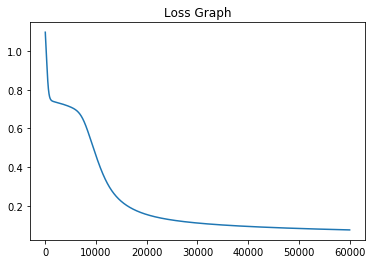

In [19]:
accuracy=[]
hiddenNeuron=16
lr=0.1
n4 = FCNeuron()
bound = np.sqrt(1./2)
w1 = np.random.uniform(-bound, bound, (2, hiddenNeuron))
b1 = np.random.uniform(-bound, bound, hiddenNeuron)
bound = np.sqrt(1./hiddenNeuron)
w2 = np.random.uniform(-bound, bound, (hiddenNeuron, 3))
b2 = np.random.uniform(-bound, bound, 3)
n4.set_params([w1, w2], [b1, b2])

costs = n4.fit(X_train, y_train_enc, 60000, lr)
y_hat = n4.predict(X_train)
accuracy.append(accuracy_score(labels, y_hat))
print('Accuracy: %.2f' %accuracy_score(labels, y_hat))
    
plt.plot(costs)
plt.title('Loss Graph')
plt.show()

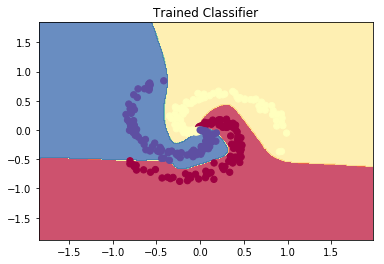

In [21]:
# plot the resulting classifier
h = 0.01
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = n4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title('Trained Classifier')
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()